In [1]:
from lblcrn.homogenous_crn.solution import *
from lblcrn.homogenous_crn.sym import *
from lblcrn.homogenous_crn.xps import *
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
import seaborn as sb
import scipy.signal as signal
from mpl_toolkits.axes_grid1 import ImageGrid


In [2]:
# 1e-6_rt
sols = []
sm = SpeciesManager()

#[535.0 , 532.2 , 530.9 , 530.0 , 531.6 ,  531.6 ,  533.2, 535.0]
#[y1, x2, x3, x4, x53, x54, x6, x7]
y1 = sm.sp('y1', Orbital('1s', 535.0), {0:1.0000})
x2 = sm.sp('x2', Orbital('1s', 532.2), {0:0})
x3 = sm.sp('x3', Orbital('1s', 530.9), {0:0})
x4 = sm.sp('x4', Orbital('1s', 530.0), {0:0.25})
x53 = sm.sp('x53', Orbital('1s', 531.6), {0:0})
x54 = sm.sp('x54', Orbital('1s', 531.6), {0:0})
x6 = sm.sp('x6', Orbital('1s', 533.2), {0:0})
x7 = sm.sp('x7', Orbital('1s', 535.0), {0:0})

multipliers = [0.1, 0.5, 1, 5, 10]
default_rxn_consts = [0.236191, 0.169813, 2.023611, 0.494166, 0.628183, 0.501633, 4.283841, 0.116718, 2.944421, 2.116930, 0.152889, 3.270343, 0.329519, 1.111032]

# System Solving

In [3]:
# Test code that will be moved into a module
for i in range(len(default_rxn_consts)):
    for j in range(5):
        scaled = list(default_rxn_consts)
        scaled[i] *= multipliers[j]
        
        rsys = RxnSystem(
            Rxn(x4 + y1, x54, scaled[0]), # 0
            Rxn(x3 + y1, x53, scaled[1]), # 1
            Rxn(x54, x3 + x3, scaled[2]), # 2
            Rxn(x3 + x3, x54, scaled[3]), # 3
            Rxn(x53, x2 + x3, scaled[4]), # 4
            Rxn(x54, x2 + x4, scaled[5]), # 5
            Rxn(x2, y1, scaled[6]), # 6
            Rxn(y1, x2, scaled[7]), # 7
            Rxn(x53, y1 + x3, scaled[8]), # 8
            Rxn(x54, x4 + y1, scaled[9]), # 9
            Rxn(x53 + y1, x6, scaled[10]), # 10
            Rxn(x6, x53 + y1, scaled[11]), # 11
            Rxn(x4 + x4, x7, scaled[12]), # 12
            Rxn(x7, x4 + x4, scaled[13]), # 13
            sm
        )
        s = solve(rsys, time=10000)
        sols.append(s)
        print('Solved for ('+str(i)+', '+str(j)+')')
        print(scaled)
        print('\n')

Solved for (0, 0)
[0.023619100000000004, 0.169813, 2.023611, 0.494166, 0.628183, 0.501633, 4.283841, 0.116718, 2.944421, 2.11693, 0.152889, 3.270343, 0.329519, 1.111032]


Solved for (0, 1)
[0.1180955, 0.169813, 2.023611, 0.494166, 0.628183, 0.501633, 4.283841, 0.116718, 2.944421, 2.11693, 0.152889, 3.270343, 0.329519, 1.111032]


Solved for (0, 2)
[0.236191, 0.169813, 2.023611, 0.494166, 0.628183, 0.501633, 4.283841, 0.116718, 2.944421, 2.11693, 0.152889, 3.270343, 0.329519, 1.111032]


Solved for (0, 3)
[1.180955, 0.169813, 2.023611, 0.494166, 0.628183, 0.501633, 4.283841, 0.116718, 2.944421, 2.11693, 0.152889, 3.270343, 0.329519, 1.111032]


Solved for (0, 4)
[2.36191, 0.169813, 2.023611, 0.494166, 0.628183, 0.501633, 4.283841, 0.116718, 2.944421, 2.11693, 0.152889, 3.270343, 0.329519, 1.111032]


Solved for (1, 0)
[0.236191, 0.0169813, 2.023611, 0.494166, 0.628183, 0.501633, 4.283841, 0.116718, 2.944421, 2.11693, 0.152889, 3.270343, 0.329519, 1.111032]


Solved for (1, 1)
[0.236191

Solved for (10, 1)
[0.236191, 0.169813, 2.023611, 0.494166, 0.628183, 0.501633, 4.283841, 0.116718, 2.944421, 2.11693, 0.0764445, 3.270343, 0.329519, 1.111032]


Solved for (10, 2)
[0.236191, 0.169813, 2.023611, 0.494166, 0.628183, 0.501633, 4.283841, 0.116718, 2.944421, 2.11693, 0.152889, 3.270343, 0.329519, 1.111032]


Solved for (10, 3)
[0.236191, 0.169813, 2.023611, 0.494166, 0.628183, 0.501633, 4.283841, 0.116718, 2.944421, 2.11693, 0.764445, 3.270343, 0.329519, 1.111032]


Solved for (10, 4)
[0.236191, 0.169813, 2.023611, 0.494166, 0.628183, 0.501633, 4.283841, 0.116718, 2.944421, 2.11693, 1.52889, 3.270343, 0.329519, 1.111032]


Solved for (11, 0)
[0.236191, 0.169813, 2.023611, 0.494166, 0.628183, 0.501633, 4.283841, 0.116718, 2.944421, 2.11693, 0.152889, 0.3270343, 0.329519, 1.111032]


Solved for (11, 1)
[0.236191, 0.169813, 2.023611, 0.494166, 0.628183, 0.501633, 4.283841, 0.116718, 2.944421, 2.11693, 0.152889, 1.6351715, 0.329519, 1.111032]


Solved for (11, 2)
[0.236191, 0.

In [4]:
import pickle
with open('../ag_highp_hight.pkl', 'wb') as f:
    pickle.dump(sols, f)

# Analysis

In [5]:
sols = pickle.load(open('../data/ag_highp_hight.pkl', 'rb'))

In [8]:
x = read_new_data('../data/ag_100e-3_300.txt', be=0)
j = 0
for i, s in enumerate(sols):
    j += 1
    j = j % len(multipliers)
    
    s.set_experimental(x[0])

In [13]:
for s in sols:
    s.ignore = [y1]
    s.process()

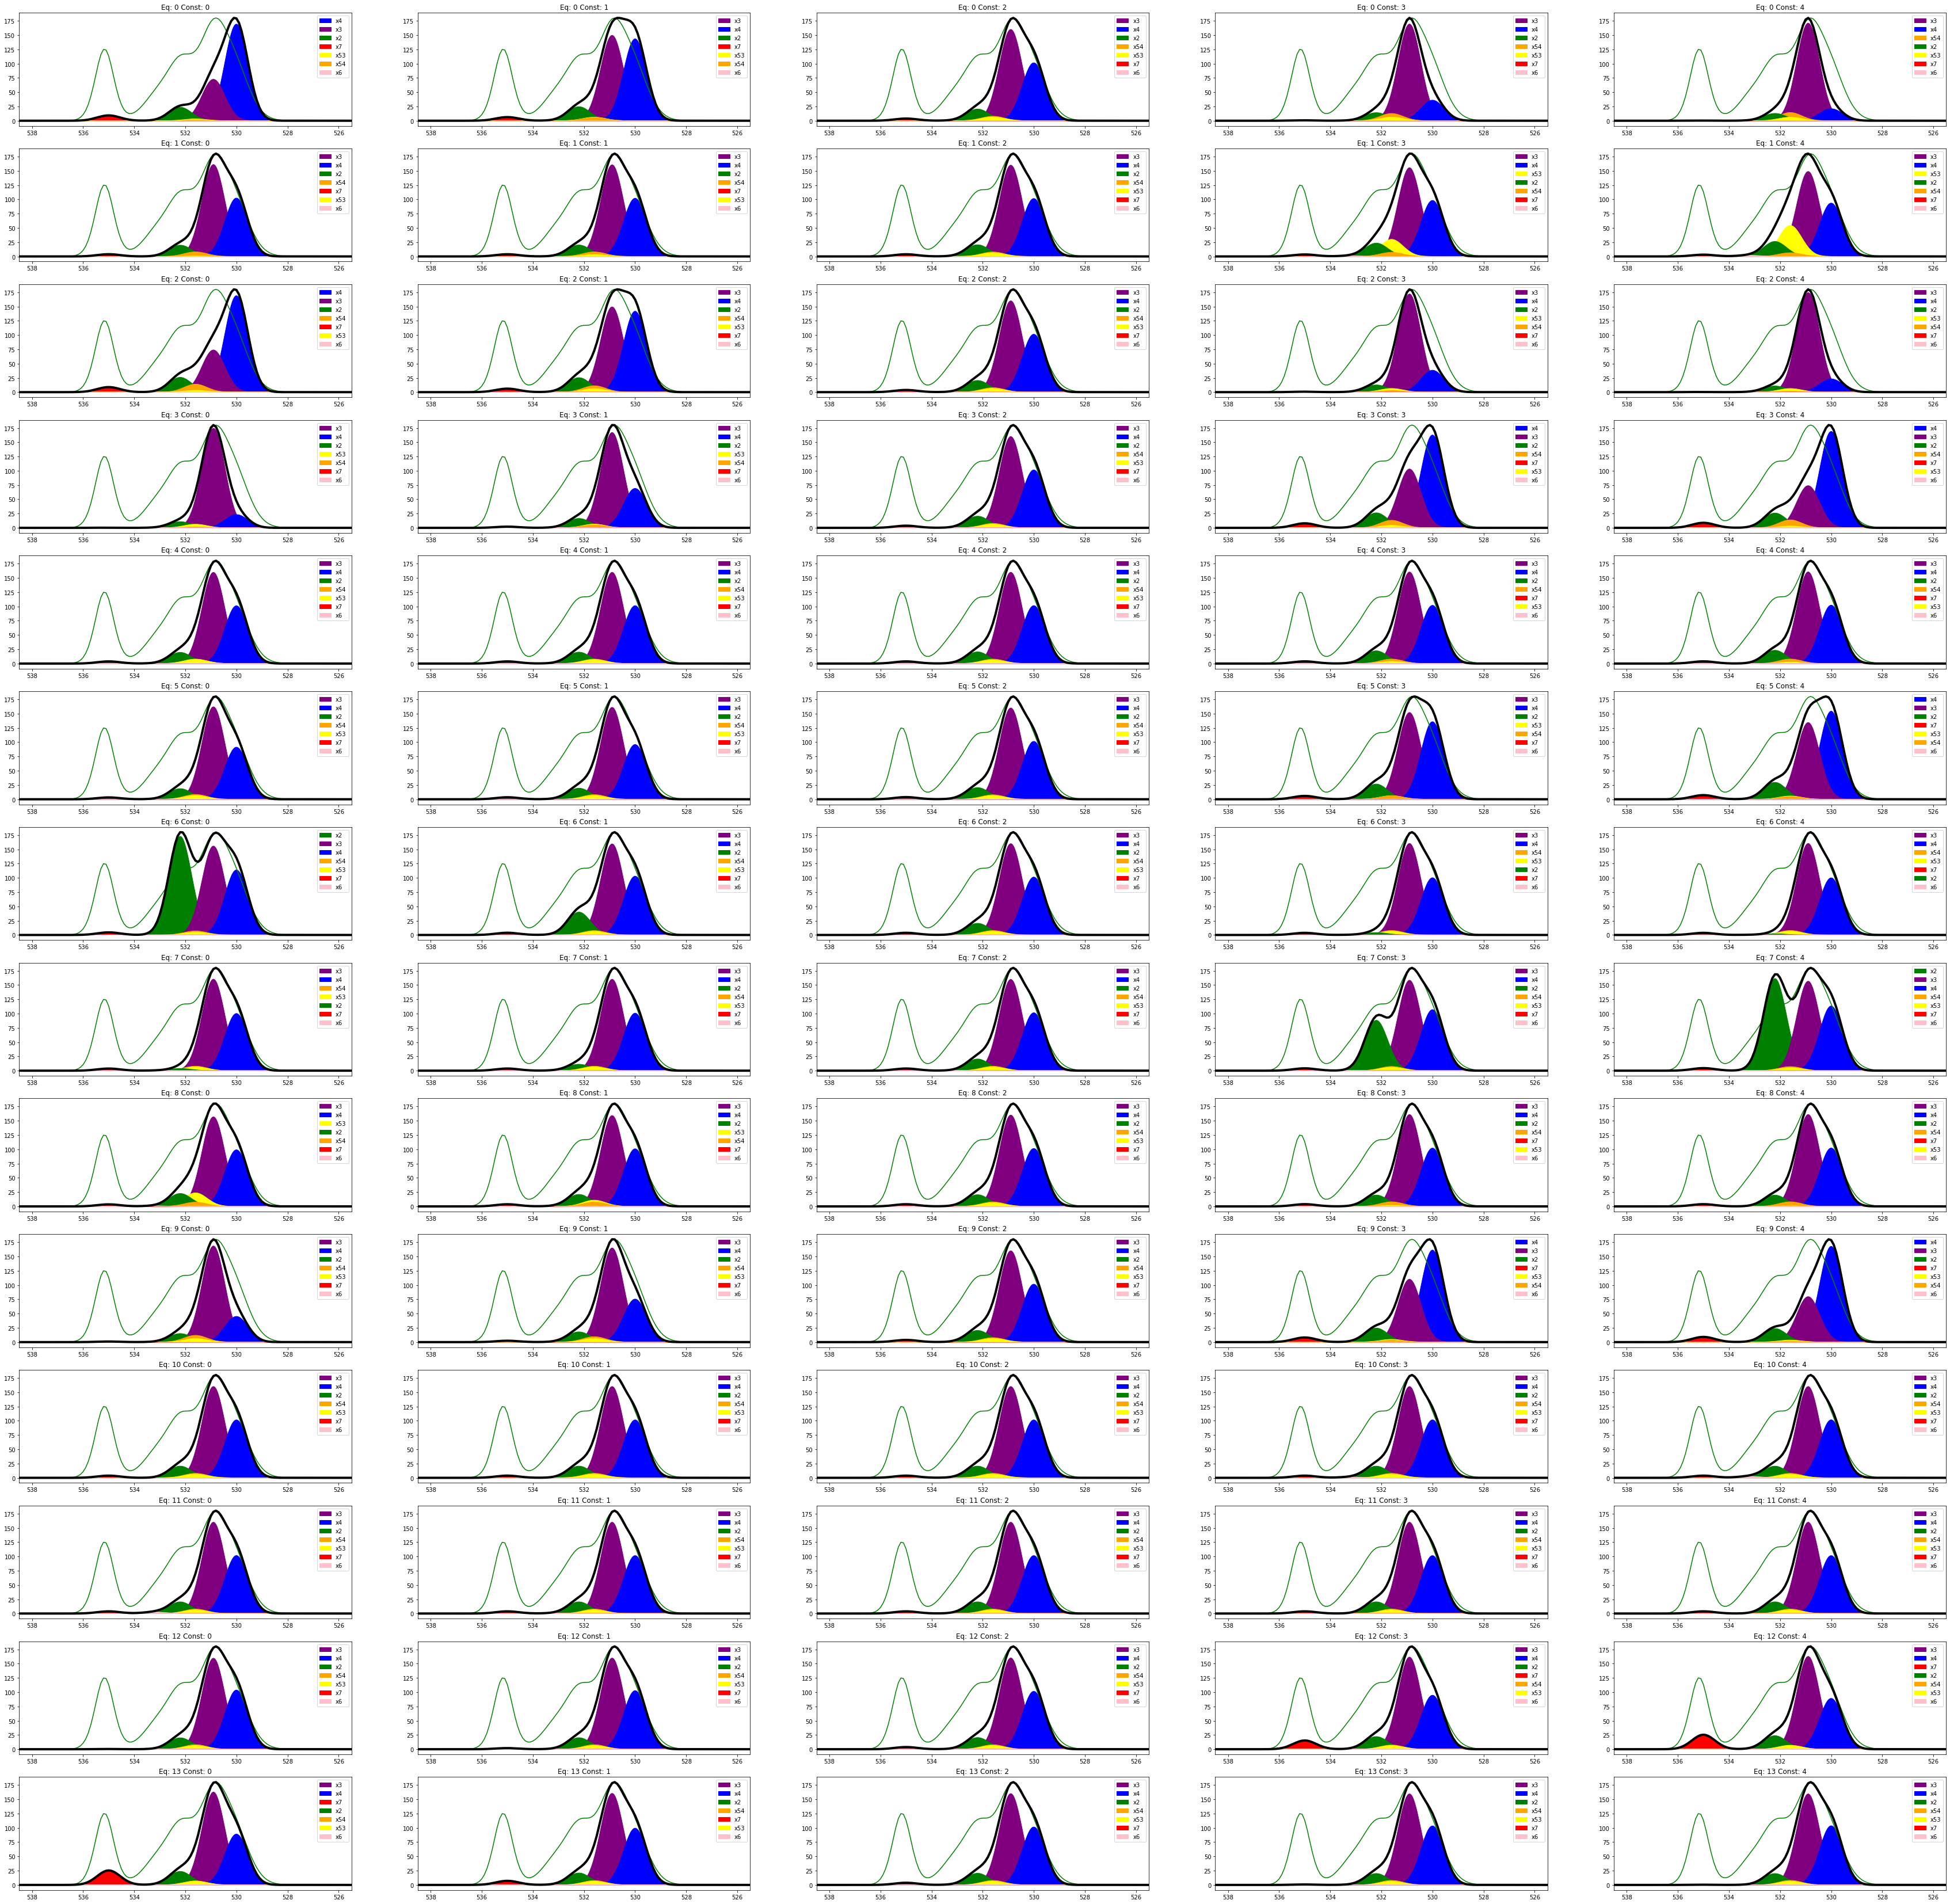

In [14]:
fig, axes = plt.subplots(nrows=14, ncols=5, figsize=(60,60))
for i in range(len(sols)):
    sols[i].plot_gaussian(envelope=True, resample_envelope=True, overlay=True, ax=axes[int(i/5), int(i%5)], title=('Eq: ' + str(int(i/5)) + ' Const: ' + str(i % 5)))
plt.show()

# RMSE

In [15]:
rmses_list = []
for i in range(len(default_rxn_consts)):
    rmses_list.append([])
    for j in range(5):
        rmses_list[i].append(sols[i*5 + j].rmse())
rmses = pd.DataFrame(rmses_list, columns=['0.1', '0.5', '1', '5', '10'])
rmses

,0.1,0.5,1,5,10
0,46.900175,39.632417,38.878418,42.446972,43.931296
1,39.607351,39.275262,38.878418,36.375955,34.660635
2,44.575884,38.865906,38.878418,43.319398,45.048850
3,45.049207,40.521414,38.878418,41.691208,44.577132
4,38.892758,38.885605,38.878418,38.850159,38.838419
5,39.202769,39.036416,38.878418,38.877199,40.021641
6,31.640915,35.915228,38.878418,41.599399,41.960141
7,41.663571,40.386879,38.878418,30.684842,30.725675
8,36.959223,38.355095,38.878418,39.495826,39.591545
9,41.660866,39.629445,38.878418,42.689197,46.010551


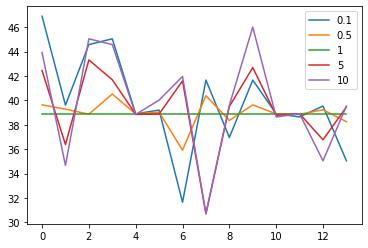

In [16]:
rmses.plot()

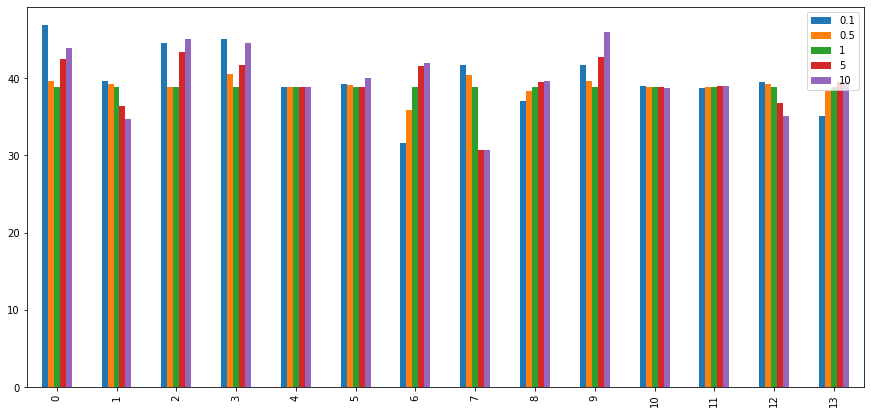

In [17]:
rmses.plot.bar(figsize=(15,7))

In [18]:
rmses_min = rmses.agg(['min', 'idxmin']).T
rmses_min

,min,idxmin
0.1,31.640915,6.0
0.5,35.915228,6.0
1,38.878418,0.0
5,30.684842,7.0
10,30.725675,7.0


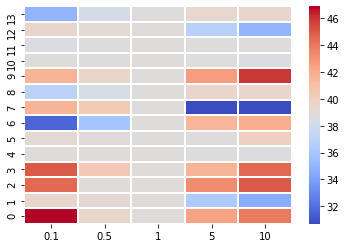

In [19]:
rmse_heatmap = sb.heatmap(rmses, cmap='coolwarm', linewidths=1)
rmse_heatmap.invert_yaxis()

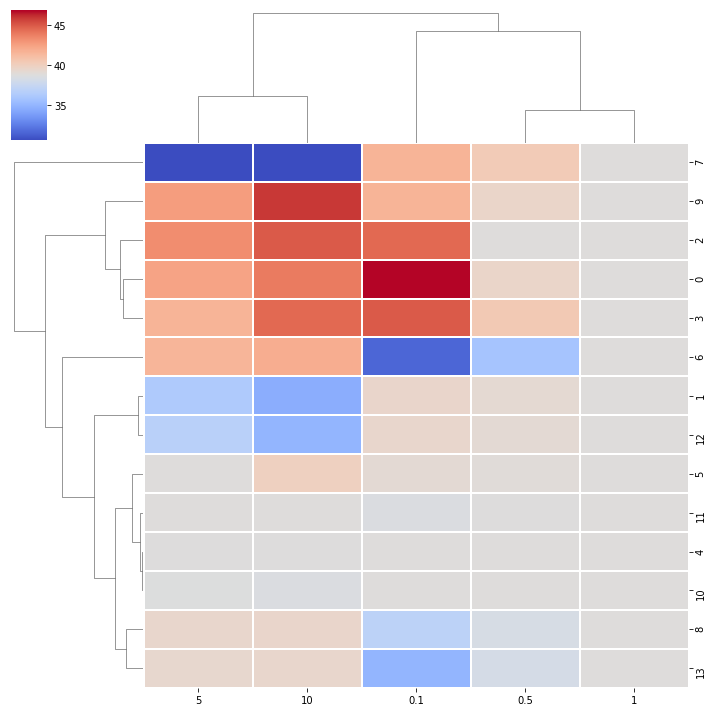

In [20]:
rmse_clustermap = sb.clustermap(rmses, cmap='coolwarm', linewidths=1)